In [0]:
from tensorflow.keras.datasets import mnist

(train_data,train_target),(test_data,test_target)=mnist.load_data()

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout

model=Sequential()

model.add(Flatten(input_shape=(28,28)))
#Converting the 2D image to a column vector

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [10]:
new_train_data=train_data/255.0
new_test_data=test_data/255.0

from tensorflow.keras import utils as np_utils

new_train_target=np_utils.to_categorical(train_target)
new_test_target=np_utils.to_categorical(test_target)

print(train_target[:5])
print(new_train_target[:5])

[5 0 4 1 9]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [11]:
train_infor=model.fit(new_train_data,new_train_target,epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4901 - accuracy: 0.8511 - val_loss: 0.1588 - val_accuracy: 0.9553
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2503 - accuracy: 0.9312 - val_loss: 0.1237 - val_accuracy: 0.9643
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1987 - accuracy: 0.9462 - val_loss: 0.1191 - val_accuracy: 0.9665
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1781 - accuracy: 0.9506 - val_loss: 0.1035 - val_accuracy: 0.9712
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1621 - accuracy: 0.9565 - val_loss: 0.0961 - val_accuracy: 0.9732
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1495 - accuracy: 0.9586 - val_loss: 0.0996 - val_accuracy: 0.9736
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1360 - accuracy: 0.9621 - val_loss: 0.1022 - val_accuracy:

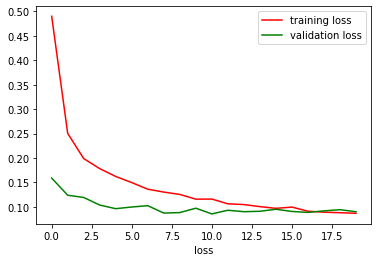

In [12]:
from matplotlib import pyplot as plt

plt.plot(train_infor.history['loss'],'r',label='training loss')
plt.plot(train_infor.history['val_loss'],'g',label='validation loss')
plt.legend()
plt.xlabel('# epochs')
plt.xlabel('loss')
plt.show()

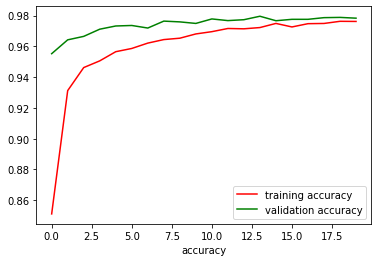

In [13]:
plt.plot(train_infor.history['accuracy'],'r',label='training accuracy')
plt.plot(train_infor.history['val_accuracy'],'g',label='validation accuracy')
plt.legend()
plt.xlabel('# epochs')
plt.xlabel('accuracy')
plt.show()

In [0]:
results=model.predict(test_data)

In [8]:
model.evaluate(new_test_data,new_test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.1210 - accuracy: 0.9784


[0.1210416629910469, 0.9783999919891357]

In [0]:
model.save('MNIST-FFNN.model',save_format="h5")